In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.chdir('../../')

In [3]:
from musicautobot.numpy_encode import *
from musicautobot.utils.file_processing import process_all, process_file
from musicautobot.config import *
from musicautobot.music_transformer import *

In [4]:
# Location of your midi filesfiles
midi_path = Path('data/midi/examples')
data_path = Path('data/numpy')
data_save_name = 'musicitem_data_save.pkl'

In [ ]:
midi_files = get_files(midi_path, '.mid', recurse=True)
data = MusicDataBunch.from_files(midi_files, data_path, processors=[Midi2ItemProcessor()], bs=2, bptt=12)

learn = music_model_learner(data, arch=TransformerXL, config=default_config())

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.432372,3.738258,0.455128,00:27
1,2.466032,4.076462,0.176282,00:27
2,2.561378,4.317347,0.182692,00:26
3,2.429363,4.118815,0.442308,00:26


## 5. Predict

In [12]:
midi_file = Path('data/single_bar_example.mid')
item = MusicItem.from_file(midi_file, data.vocab);
pred = learn.predict(item, n_words=100)

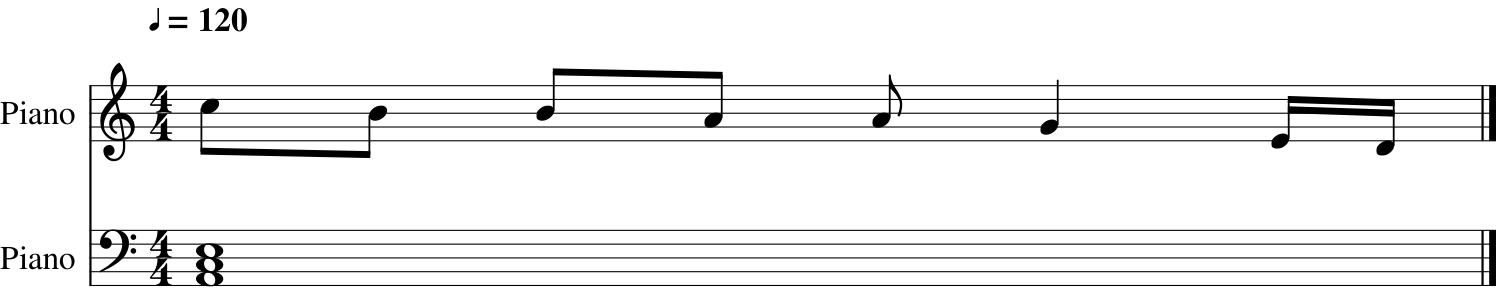

In [13]:
pred.show()

Here's what the seed sounds like: